In [31]:
!pip install pandas
!pip install matplotlib
!pip install seaborn


  Using cached matplotlib-3.10.3-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.2-cp311-cp311-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.8-cp311-cp311-win_amd64.whl.metadata (6.3 kB)
  Using cached pillow-11.3.0-cp311-cp311-win_amd64.whl.metadata (9.2 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.3-cp311-cp311-win_amd64.whl (8.1 MB)
Using cached contourpy-1.3.2-cp311-cp311-win_amd64.whl (222 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 2.3/2.3 MB 16.0 MB/s eta 0:00:00
Using cached kiwisolver-1.4.8-cp311-cp311-win_amd64.whl (71 kB)
Using cached pillow-11.3.0-cp311-cp311-win_amd64.whl (7.0 MB)
Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)

   ---------------------------------------- 0/7 [pyparsing]

In [2]:
from datetime import datetime
import pandas as pd 

In [3]:
now = datetime.now()
now

datetime.datetime(2025, 7, 19, 13, 38, 10, 68402)

In [4]:
print(now.year)
print(now.month)
print(now.day)

2025
7
19


In [5]:
from datetime import timedelta
#O timedelta é usado para calcular a variança de tempo entre duas datas
timedelta(12)

datetime.timedelta(days=12)

In [6]:
delta = now - timedelta(12)
delta

datetime.datetime(2025, 7, 7, 13, 38, 10, 68402)

Podemos formatar as datas em strings, utilizando str ou strtime, passando o formato específicado

In [7]:
str(now)

'2025-07-19 13:38:10.068402'

In [8]:
now.strftime("%Y-%m-%d")  # Formata a data como string

'2025-07-19'

In [9]:
fecha = '2011-01-03'
datetime.strptime(fecha, "%Y-%m-%d")  # Converte string para datetime

datetime.datetime(2011, 1, 3, 0, 0)

In [10]:
#podemos tambem criar espações para dividir o começo e o fim de uma data
list_of_str_date = ['2024/1/1', '2024/12/31']
data_pd = pd.to_datetime(list_of_str_date)
data_pd


DatetimeIndex(['2024-01-01', '2024-12-31'], dtype='datetime64[ns]', freq=None)

## Creating data ranges
Podemos criar índices pegando cada dia desse intervalo

In [11]:
index = pd.date_range('2024/1/1', '2024/12/31')
index

DatetimeIndex(['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04',
               '2024-01-05', '2024-01-06', '2024-01-07', '2024-01-08',
               '2024-01-09', '2024-01-10',
               ...
               '2024-12-22', '2024-12-23', '2024-12-24', '2024-12-25',
               '2024-12-26', '2024-12-27', '2024-12-28', '2024-12-29',
               '2024-12-30', '2024-12-31'],
              dtype='datetime64[ns]', length=366, freq='D')

In [12]:
type(index)

pandas.core.indexes.datetimes.DatetimeIndex

In [13]:
#Imporando o dataset 
data = pd.read_csv(r'C:\Users\vish8\OneDrive\Desktop\Cursos\MLtoGeoscience\ML_TO_GEOSCIENCE\Dados\data_et0.csv')
data

,Year,Month,Date,ET0_mm,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,1990,1,1990-02-01,229.1,NaN,NaN,NaN
1,1990,2,1990-03-04,155.9,NaN,NaN,NaN
2,1990,3,1990-04-04,167.9,NaN,NaN,NaN
3,1990,4,1990-05-05,81.3,NaN,NaN,NaN
4,1990,5,1990-06-05,40.9,NaN,NaN,NaN
...,...,...,...,...,...,...,...
367,2020,8,2020-09-05,51.4,NaN,NaN,NaN
368,2020,9,2020-10-06,80.8,NaN,NaN,NaN
369,2020,10,2020-11-06,137.4,NaN,NaN,NaN
370,2020,11,2020-12-07,213.4,NaN,NaN,NaN


In [14]:
#De acordo com a análise gráfica dos dados podemos excluir alguns dados que nao serao necessarios
data = data.drop(['Year', 'Month', 'Unnamed: 4', 'Unnamed: 5','Unnamed: 6'], axis=1)

In [15]:
data

,Date,ET0_mm
0,1990-02-01,229.1
1,1990-03-04,155.9
2,1990-04-04,167.9
3,1990-05-05,81.3
4,1990-06-05,40.9
...,...,...
367,2020-09-05,51.4
368,2020-10-06,80.8
369,2020-11-06,137.4
370,2020-12-07,213.4


In [16]:
#Checando se temos valores duplicados
data.duplicated().sum()  # Retorna o número de linhas duplicadas

np.int64(0)

In [17]:
#Dados faltantes
data.isnull().sum()  # Retorna o número de valores faltantes por coluna

Date      0
ET0_mm    0
dtype: int64

In [18]:
#Now we convert the date into a datatime object and set it as the index
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')

In [19]:
data.set_index('Date', inplace=True)  # Define 'Date' como o índice do DataFrame
data.index

DatetimeIndex(['1990-02-01', '1990-03-04', '1990-04-04', '1990-05-05',
               '1990-06-05', '1990-07-06', '1990-08-06', '1990-09-06',
               '1990-10-07', '1990-11-07',
               ...
               '2020-04-03', '2020-05-04', '2020-06-04', '2020-07-05',
               '2020-08-05', '2020-09-05', '2020-10-06', '2020-11-06',
               '2020-12-07', '2021-01-01'],
              dtype='datetime64[ns]', name='Date', length=372, freq=None)

In [20]:
#Selecionando um intevalo de tempo e vendo os valores
data['2000-01-01':'2000-12-31']

,ET0_mm
Date,
2000-01-01,74.0
2000-02-01,202.0
2000-03-03,224.8
2000-04-03,147.6
2000-05-04,78.2
2000-06-04,32.8
2000-07-05,21.2
2000-08-05,31.0
2000-09-05,48.6


In [21]:
data['2009' : '2010']

,ET0_mm
Date,
2009-01-01,92.0
2009-02-01,286.4
2009-03-04,239.4
2009-04-04,147.0
2009-05-05,120.4
2009-06-05,41.6
2009-07-06,28.2
2009-08-06,27.8
2009-09-06,56.6


## Resampling and  Grouping

**Resampling :** Agrupar dados com base em intervalos de tempos ( por dia, mes, hora), desde que o **índice** do dataframe seja uma coluna *datetime*.

-> precisamos do datetime

In [22]:
df = pd.DataFrame({
    'data': pd.date_range('2024-01-01', periods=6, freq = 'D'),
    'vendas' : [10,20,30,40,50,60],
})
df = df.set_index('data')
mensal = df.resample('M').sum() # 'M' = mensal
print(mensal)

            vendas
data              
2024-01-31     210


C:\Users\vish8\AppData\Local\Temp\ipykernel_17100\524939283.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  mensal = df.resample('M').sum() # 'M' = mensal


**Grupby :**
Agrupar dados com base em valores de uma ou mais colunas(ex: grupo, cidade, produto, categoria)

In [23]:
df = pd.DataFrame({
    'cidade': ['SP', 'SP', 'RJ', 'RJ', 'MG'],
    'vendas': [100, 150, 200, 120, 80]
})

agrupado = df.groupby('cidade')['vendas'].sum()
print(agrupado)

cidade
MG     80
RJ    320
SP    250
Name: vendas, dtype: int64


## Continuação do código

Podemos 'resamplear' os dados de forma temporaria. Por exemplo, 'resamplear' por dia. Podemos criar dados sequenciais que nao tinham no dataset original

In [24]:
res_data = data.resample('D').asfreq() #Resampleando por dia
res_data

,ET0_mm
Date,
1990-02-01,229.1
1990-02-02,NaN
1990-02-03,NaN
1990-02-04,NaN
1990-02-05,NaN
...,...
2020-12-28,NaN
2020-12-29,NaN
2020-12-30,NaN


In [26]:
#Tambem podemos aplicar o resample em um função do ano

res_data = data.resample('Y').sum()
res_data  # Resampleando por ano

C:\Users\vish8\AppData\Local\Temp\ipykernel_17100\3691489019.py:3: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  res_data = data.resample('Y').sum()


,ET0_mm
Date,
1990-12-31,1267.2
1991-12-31,1423.5
1992-12-31,1239.4
1993-12-31,1199.0
1994-12-31,1366.0
1995-12-31,1325.8
1996-12-31,1247.8
1997-12-31,1439.2
1998-12-31,1429.4


In [27]:
#Podemos tambem definir o ano como o índice do dataframe
res_data.index = res_data.index.year
res_data

,ET0_mm
Date,
1990,1267.2
1991,1423.5
1992,1239.4
1993,1199.0
1994,1366.0
1995,1325.8
1996,1247.8
1997,1439.2
1998,1429.4


In [28]:
#Podemos tambem agrupar o dataser pelo mês ou ano 
data.groupby(lambda x: x.month).mean()  # Agrupa por mês e calcula a média

,ET0_mm
Date,
1,93.754839
2,226.429032
3,203.916129
4,143.832258
5,79.177419
6,35.300000
7,25.474194
8,31.709677
9,54.470968


## Visualizacao dos dados

In [29]:
data

,ET0_mm
Date,
1990-02-01,229.1
1990-03-04,155.9
1990-04-04,167.9
1990-05-05,81.3
1990-06-05,40.9
...,...
2020-09-05,51.4
2020-10-06,80.8
2020-11-06,137.4


<Axes: xlabel='Date'>

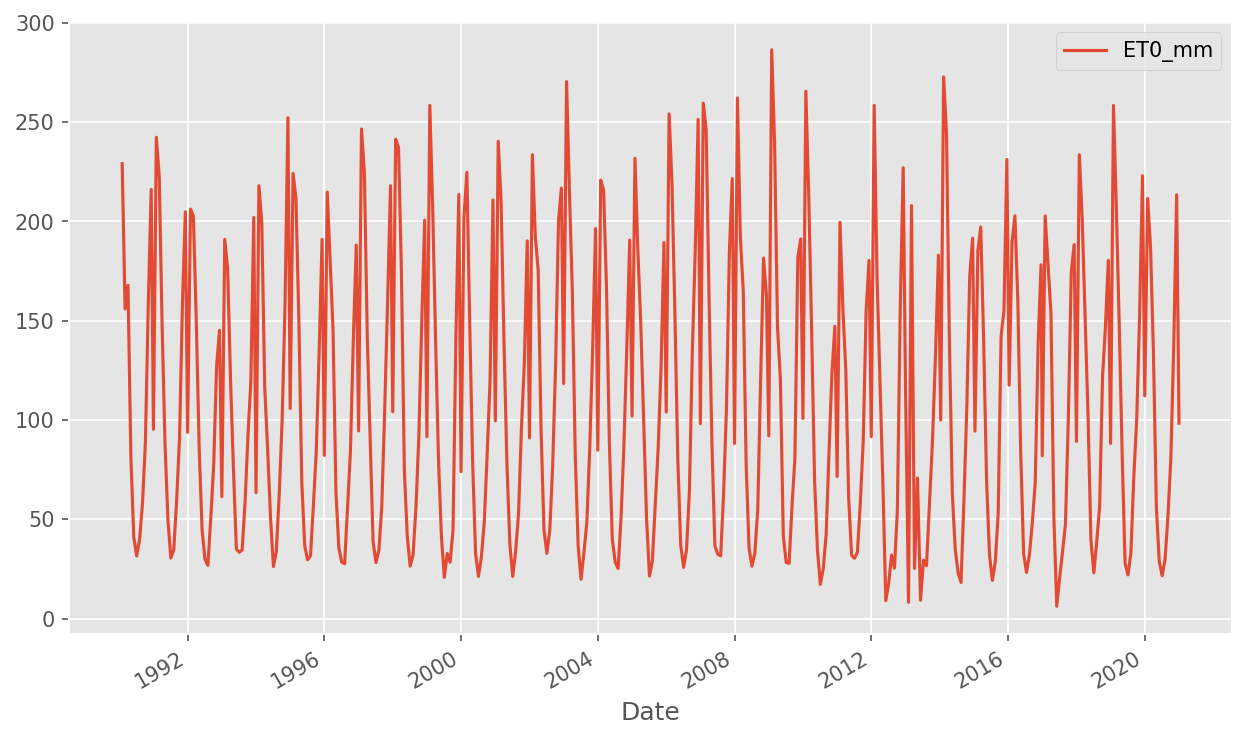

In [32]:
import matplotlib as mpl 
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rcParams['figure.dpi'] = 150 # Definindo a resolução dos gráficos
pd.set_option('display.expand_frame_repr', False)  # Exibe o DataFrame completo no console
plt.style.use('ggplot')
mpl.rcParams['figure.figsize'] = (10, 6)  # Define o tamanho padrão dos gráficos
mpl.rcParams['axes.grid'] = True  # Ativa a grade nos gráficos
data.plot()


## box plot

quando estamos trabalhando com series temporais, box plos podem ser usados para ver a distribuição dos valores em um determinado intervalo

Vamos criar um boxplot para ver o ano e o lugar 

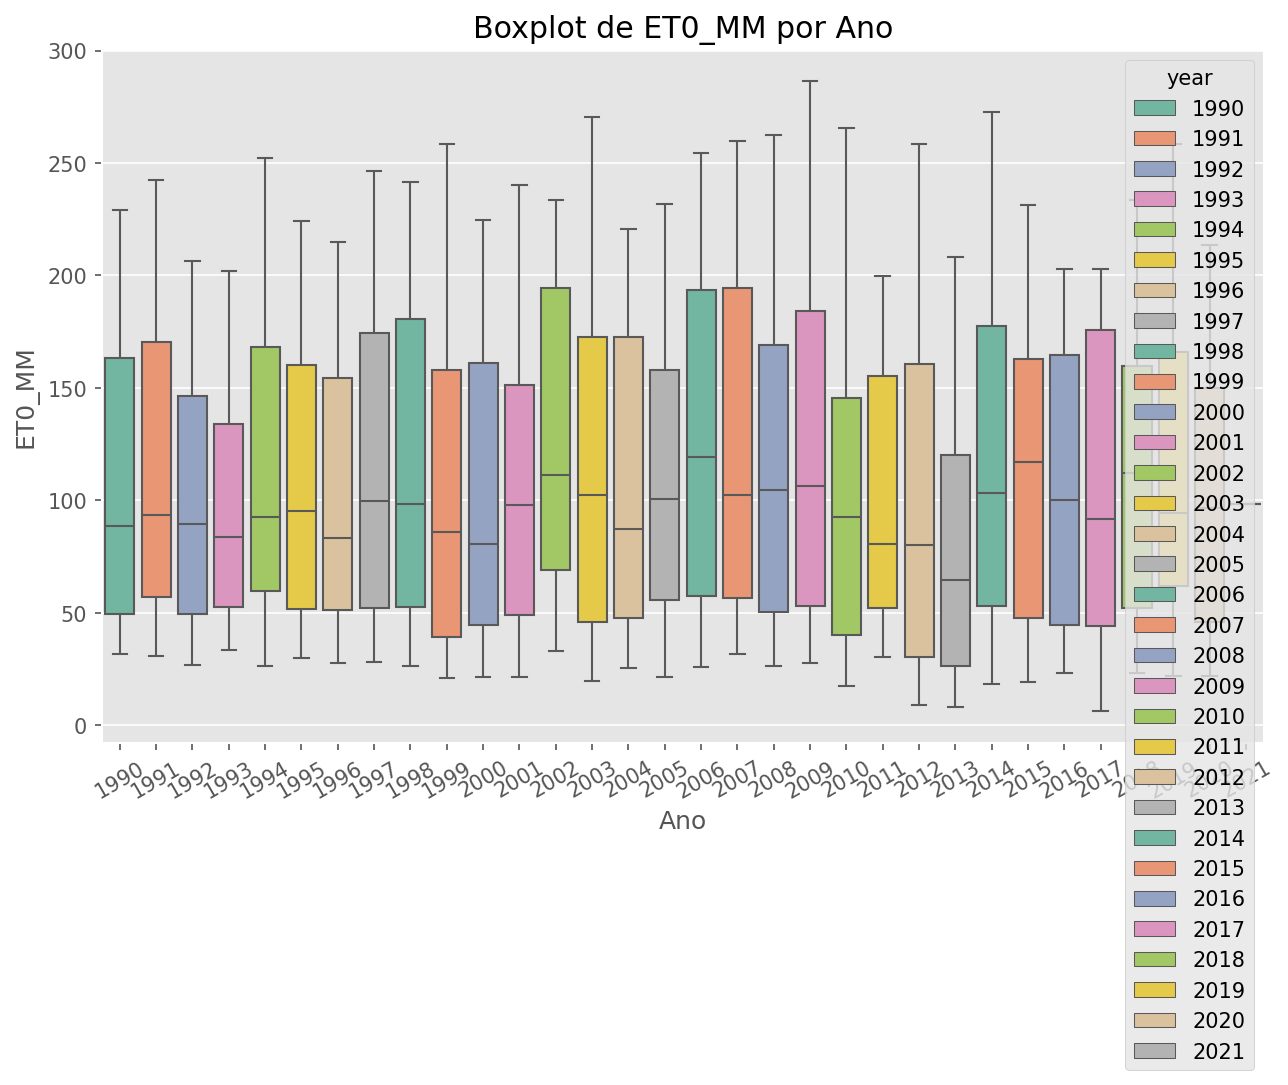

In [34]:
data['year'] = data.index.year 
sns.boxplot(data=data, x="year", y="ET0_mm", hue="year", palette = 'Set2')
# Visualizando os dado
plt.xticks(rotation = 30)  # Rotaciona os rótulos do eixo x para melhor visualização
plt.title('Boxplot de ET0_MM por Ano')
plt.xlabel('Ano')
plt.ylabel('ET0_MM')
plt.show()  # Exibe o gráfico


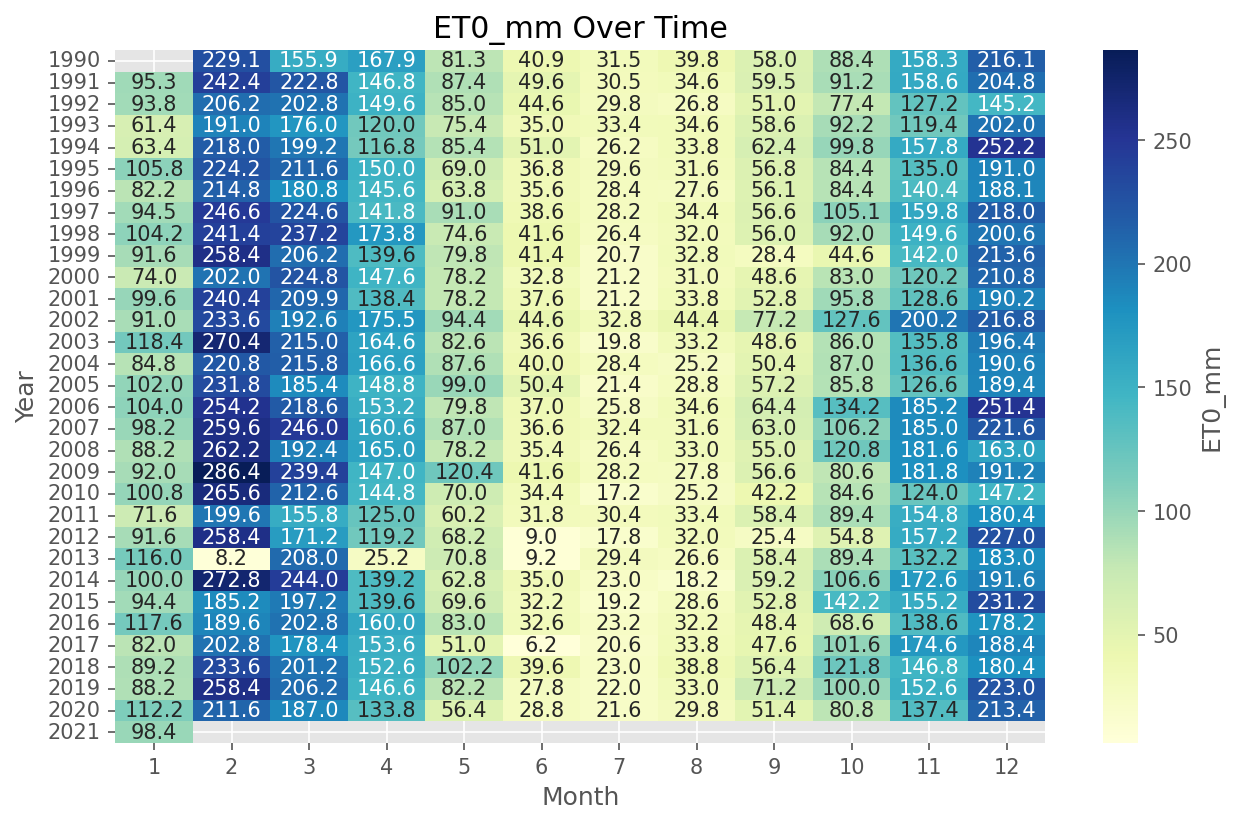

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Garantir que o índice é datetime
data.index = pd.to_datetime(data.index)

# Extrair ano e mês como colunas
data["year"] = data.index.year
data["month"] = data.index.month

# Agrupar por ano e mês
data_grouped = data.groupby(["year", "month"]).sum()

# Ajustar pivot (supondo que a coluna de interesse seja 'ET0_mm')
sales_month_year = data_grouped["ET0_mm"].reset_index().pivot(index="year", columns="month", values="ET0_mm")

# Criar o heatmap
sns.heatmap(sales_month_year, cbar_kws={"label": "ET0_mm"}, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("ET0_mm Over Time")
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()
